In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
stats.rv_continuous

scipy.stats._distn_infrastructure.rv_continuous

In [3]:
stats.rv_discrete

scipy.stats._distn_infrastructure.rv_discrete

### Дискретные распределения

Распределение Бернулли

In [4]:
rv_bernoulli = stats.bernoulli(p = 0.3)

In [5]:
rv_bernoulli.rvs(14)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0])

Биномиальное распределение

Обощение распр бернулли, здесь рассм. успех или неудача в n экспериментах, поэтому для генерации выборки нужно задать два параметра: вероятность успеха и общее кол-во экспериментов.

In [6]:
rv_binom = stats.binom(100, p = 0.9)

In [7]:
rv_binom.rvs(8)

array([94, 88, 89, 94, 94, 98, 91, 93])

(array([ 2.,  7.,  3.,  9., 12., 15., 20.,  3.,  4.,  5.]),
 array([83. , 84.3, 85.6, 86.9, 88.2, 89.5, 90.8, 92.1, 93.4, 94.7, 96. ]),
 <a list of 10 Patch objects>)

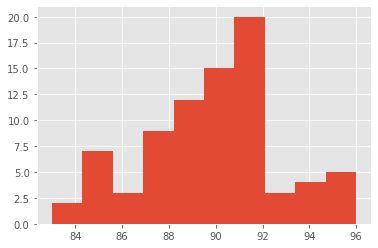

In [8]:
plt.hist(rv_binom.rvs(80), bins = 10)

### Непрерывные распределения

Равномерное распределение

это когда случайная величина определена на некотором отрезке и она встречается с одинаковой вероятностью. А за пределами этого отрезка вероятность встретить случайно величину равна нулю.

In [9]:
a = 5 #start
b = 10 #bias
 
rv_uniform = stats.uniform(a, b - a)

Считаем функцию распределения

In [10]:
rv_uniform.cdf(5.5) #указанное значение попало в интервал

0.1

In [11]:
rv_uniform.cdf(11) #указанное значение не попало в интервал

1.0

Значение плотности вероятности

In [12]:
rv_uniform.pdf(5.5)

0.2

In [13]:
rv_uniform.pdf(11) # значение вне интервала

0.0

Построим график функции распределения

Text(0.5, 1.0, 'Cumulative distribution function for uniform')

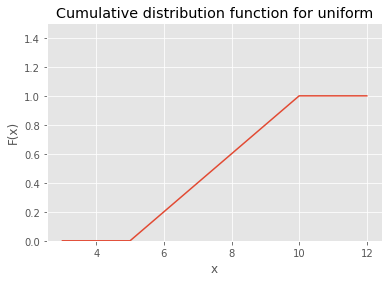

In [14]:
X = np.linspace(a - 2, b + 2, 100)
cdf = rv_uniform.cdf(X)
plt.plot(X, cdf)

plt.ylabel('F(x)')
plt.xlabel('x')
plt.ylim(0, 1.5)
plt.title(u'Cumulative distribution function for uniform')

Построим график плотности вероятности

Плотность вероятности - производная от функции распределения, то на определенном отрезко плотность вероятности постоянна.

Text(0.5, 1.0, 'PDF for uniform')

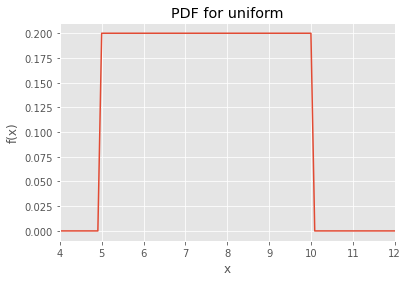

In [15]:
X = np.linspace(a - 2, b + 2, 100)
pdf = rv_uniform.pdf(X)
plt.plot(X, pdf)

plt.ylabel('f(x)')
plt.xlabel('x')
plt.xlim(4, 12)
plt.title(u'PDF for uniform')

Нормальное распределение

In [16]:
mu = 2 # среднее значение
sigma =  0.5 # среднеквадратичное отклонение

rv_norm = stats.norm(loc = mu, scale = sigma) # создание объекта нормальной величины

In [17]:
rv_norm.rvs(17)

array([2.25537826, 1.55358166, 2.30825371, 1.39846435, 0.94957166,
       1.51786141, 2.24116789, 1.91100702, 1.60821892, 1.97343385,
       0.83424972, 1.69343914, 2.29224399, 2.08200335, 3.19706112,
       2.47685429, 2.04451896])

Text(0.5, 1.0, 'CDF for norm')

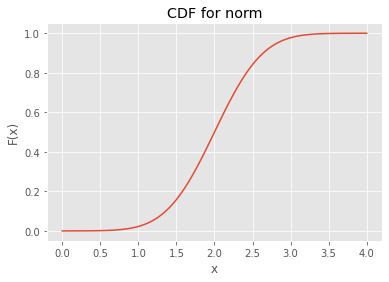

In [18]:
x = np.linspace(0, 4, 100)
cdf = rv_norm.cdf(x)
plt.plot(x, cdf)

plt.ylabel('F(x)')
plt.xlabel('x')
plt.title(u'CDF for norm')

Text(0.5, 1.0, 'PDF for norm')

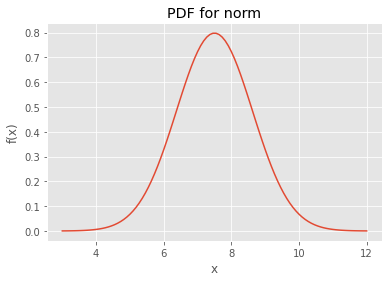

In [19]:
x = np.linspace(0, 4, 100)
pdf = rv_norm.pdf(x)
plt.plot(X, pdf)

plt.ylabel('f(x)')
plt.xlabel('x')
plt.title(u'PDF for norm')

Зафиксируем mu и будем менять среднеквадр откл. Посмотрим, как будет меняться плотность вероятности.

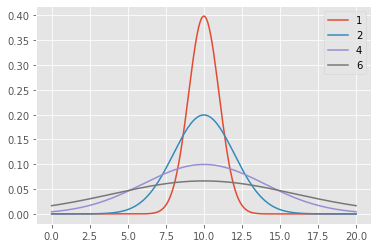

In [20]:
means = [1, 5, 10] 
mu = 10
sigmas = [1, 2, 4, 6]

for sigma in sigmas:
    rv_norm = stats.norm(loc = mu, scale = sigma)
    x = np.linspace(0, 20, 200) # генерация линейно распределенных значений от 0 до 20 (200 штук)
    cdf = rv_norm.pdf(x)
    plt.plot(x, cdf, label = sigma)
plt.legend()

Чем больше значение sigma, тем график становится более широким

Посчитаем среднее значение, дисперсию и параметр смещенности. Если распределение асимметричное, то параметр skkew не будет равен нулю, то есть существует смещение либо влево либо вправо.

In [21]:
mean, var, skew = rv_norm.stats(moments = 'mvs')

In [22]:
skew

array(0.)

In [23]:
mean

array(10.)

In [24]:
var

array(36.)